> TUGAS WEEK 2 CITARUM WATER (KHALISHAH_1103213045)

Import Libraries

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt

Memanggil atau membaca dataset

In [ ]:
dataset = pd.read_csv('CitarumWater.csv')

In [ ]:
dataset.head()

,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55°C,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55°C,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55°C,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55°C,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55°C,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,-,2.44,2


In [ ]:
dataset.tail()

,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
2495,2496,Citarum,Cisanti,11/2/2022,6.030091,25.55°C,21.152867,4.262901,1.741993,22.357555,1.604541,343.607898,0.056633,-,0.77,1
2496,2497,Citarum,Wangisagara,11/3/2022,6.176031,25.55°C,27.077853,3.151708,5.146220,11.099887,2.266671,612.311167,0.071878,-,1.61,2
2497,2498,Citarum,Koyod,11/4/2022,7.776482,25.55°C,22.022523,7.279574,5.865096,28.140202,2.103214,533.277383,0.044954,-,1.80,2
2498,2499,Citarum,Setelah IPAL Cisirung,11/5/2022,7.047090,25.55°C,32.364635,1.485632,4.624189,29.394513,1.748222,425.598926,0.096612,-,1.46,2
2499,2500,Citarum,Nanjung,11/6/2022,6.459304,25.55°C,27.895749,1.309943,4.763686,19.122593,2.310984,192.266610,0.070611,-,1.49,2


Pada dataset terdapat kolom kosong yang tidak diperlukan (O2), maka akan di drop

In [ ]:
dataset = dataset.drop('O2', axis=1)

KeyError: "['O2'] not found in axis"

In [ ]:
dataset.head()

,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55°C,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55°C,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55°C,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55°C,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55°C,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,2.44,2


Pada dataset terdapat kolom Temp yang dimana isinya terdiri dari angka dan huruf (C), maka Celsius (C) akan dihilangkan

In [10]:
dataset['Temp'] = dataset['Temp'].str.replace('°C', '').astype(float)

In [11]:
dataset[['Temp']].head()

,Temp
0,25.55
1,25.55
2,25.55
3,25.55
4,25.55


Training set dan Test set

In [12]:
X = dataset.drop(columns=['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'Class'])
y = dataset['Class']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='ovr')
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr')

In [16]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

In [20]:
print(f'Accuracy: {accuracy:4f}')
print(f'Precision: {precision:4f}')
print(f'Recall: {recall:4f}')
print(f'F1 Score: {f1:4f}')
print(f'AUC: {roc_auc:4f}')

Accuracy: 0.950000
Precision: 0.975502
Recall: 0.789116
F1 Score: 0.856917
AUC: 0.993763


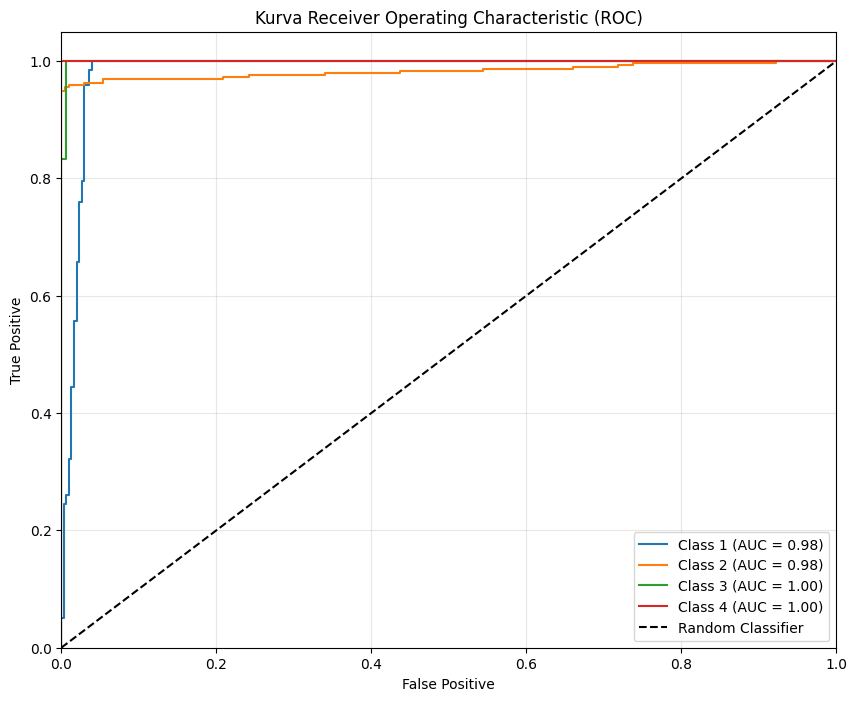

In [26]:
classes = sorted(y_test.unique())
y_test_bin = label_binarize(y_test, classes=classes)
X_test_scaled = scaler.fit_transform(X_test)
y_prob = model.predict_proba(X_test_scaled)

fpr = {}
tpr = {}
roc_auc = {}

for i, class_label in enumerate(classes):
    fpr[class_label], tpr[class_label], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

plt.figure(figsize=(10, 8))

for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = {roc_auc[class_label]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Kurva Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()